In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/
download_robot_execution_failures()

# F_x到T_z是时序数据标识
timeseries, y = load_robot_execution_failures()
print(timeseries.head())
print(y.head())

id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0
1    True
2    True
3    True
4    True
5    True
dtype: bool


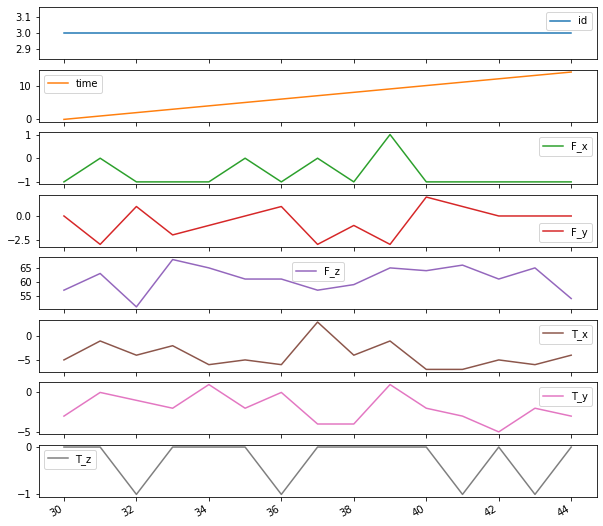

In [2]:
# 没故障机器人的数据
timeseries[timeseries.id == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

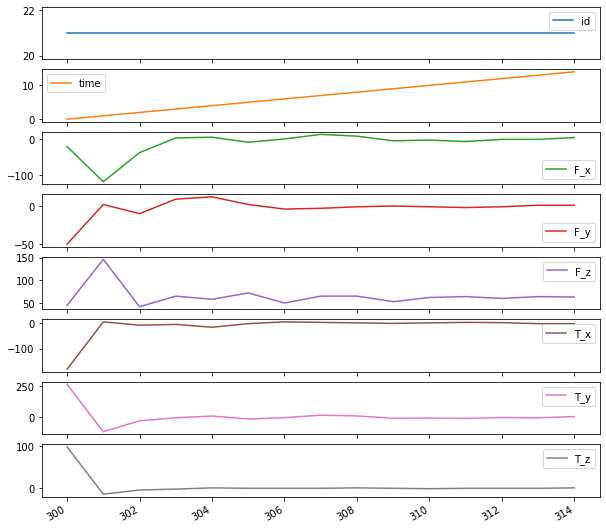

In [3]:
# 有故障机器人的数据
timeseries[timeseries.id == 21].plot(subplots=True, sharex=True, figsize=(10, 10))
plt.show()

In [4]:
# 特征工程
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id='id', column_sort='time')
extracted_features

Feature Extraction: 100%|██████████| 30/30 [00:05<00:00,  5.02it/s]


variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",...,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation,T_z__variation_coefficient
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-0.9,-1.0,0.09,NaN,...,0.0,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.000000,0.0,NaN
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,-0.7,-3.0,0.81,NaN,...,1.0,0.000000,0.000000,0.000000,4.0,11.0,0.0,0.195556,0.0,-1.658312
3,12.0,10.0,-0.029815,1.301043e-17,0.105435,1.0,-0.5,-1.0,0.45,NaN,...,1.0,0.000000,-0.090909,0.000000,4.0,11.0,0.0,0.195556,0.0,-1.658312
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-0.4,-2.0,1.24,NaN,...,1.0,0.000000,-0.181818,0.000000,6.0,8.0,1.0,0.355556,0.0,-1.788854
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-0.5,-2.0,1.05,NaN,...,1.0,-0.076923,-0.090909,-0.222222,4.0,9.0,2.0,0.382222,0.0,-4.636809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,96833.0,100.0,-0.435813,-8.343714e-01,0.538354,-25.0,-55.3,-110.0,1216.61,NaN,...,1.0,-1254.846154,-3182.363636,-6043.333333,1.0,1.0,0.0,93.315556,1.0,-0.624569
85,1683.0,19.0,-0.599870,-4.380362e-01,0.991429,12.0,6.7,4.0,5.01,NaN,...,1.0,-34.846154,-57.545455,-84.000000,1.0,1.0,0.0,4.648889,1.0,-0.621960
86,83497.0,127.0,-0.603352,-4.802260e-01,0.994691,70.0,40.4,21.0,236.84,NaN,...,1.0,81.538462,141.000000,280.888889,0.0,0.0,1.0,29.840000,1.0,-1.011593


In [5]:
# 并非所有统计值都有意义，需要过滤(根据y集将相关性低的统计值去除)
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)
features_filtered

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,T_y__count_below__t_0,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,...,-3.000000,1.0,4.0,1.000000,0.000000,0.0,-3.0,1.0,-0.310265,-0.751682
2,7.0,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,...,-4.166667,4.0,4.0,0.933333,0.000000,1.0,-9.2,1.0,-0.202951,0.057818
3,11.0,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,...,-5.833333,6.0,3.0,0.866667,0.000000,3.0,-6.6,0.0,0.539121,0.912474
4,5.0,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,...,-9.333333,5.0,5.0,0.733333,0.000000,0.0,-9.0,0.0,-2.641390,-0.609735
5,9.0,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,...,-11.833333,5.0,5.0,0.933333,0.000000,0.0,-9.6,0.0,0.591927,0.072771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,0.0,42780.0,39.541483,1563.528889,359.248162,309.190088,171261.0,291.988082,...,203.333333,3.0,2.0,0.000000,64.000000,46.0,203.2,0.0,38.559593,71.641254
85,0.0,1683.0,0.0,1523.0,3.841296,14.755556,36.770027,26.631007,503.0,14.501494,...,-29.166667,3.0,3.0,0.066667,4.666667,4.5,-41.6,0.0,14.429645,16.349699
86,0.0,83497.0,0.0,21064.0,52.807154,2788.595556,312.044052,429.697740,118013.0,121.420189,...,-53.000000,2.0,3.0,0.000000,0.250000,7.0,-84.8,0.0,60.760842,71.095480


In [6]:
# 直接提取，过滤
from tsfresh import extract_relevant_features

directed_features = extract_relevant_features(timeseries, y, column_id='id', column_sort='time')
directed_features.head()

Feature Extraction: 100%|██████████| 30/30 [00:06<00:00,  4.93it/s]


variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,T_y__count_below__t_0,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,...,-3.000000,1.0,4.0,1.000000,0.0,0.0,-3.0,1.0,-0.310265,-0.751682
2,7.0,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,...,-4.166667,4.0,4.0,0.933333,0.0,1.0,-9.2,1.0,-0.202951,0.057818
3,11.0,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,...,-5.833333,6.0,3.0,0.866667,0.0,3.0,-6.6,0.0,0.539121,0.912474
4,5.0,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,...,-9.333333,5.0,5.0,0.733333,0.0,0.0,-9.0,0.0,-2.641390,-0.609735
5,9.0,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,...,-11.833333,5.0,5.0,0.933333,0.0,0.0,-9.6,0.0,0.591927,0.072771
